In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [10]:
#Load the dataset
all_sheets = pd.read_excel("dataset.xlsx", sheet_name=None)

# Access individual sheets
air_quality_df = all_sheets['AirQuality_EPA_IL']
sod_df = all_sheets['SOD_IL_2024']
ncua_df = all_sheets['NCUA_IL_Q2_2024']

# Print sheet names
print("Sheets in the Excel file:", list(all_sheets.keys()))

Sheets in the Excel file: ['AirQuality_EPA_IL', 'SOD_IL_2024', 'NCUA_IL_Q2_2024']


In [18]:
air_quality_df.rename(columns={'census tract': 'census_tract'}, inplace=True)
sod_df.rename(columns={'census tract': 'census_tract'}, inplace=True)
ncua_df.rename(columns={'census tract': 'census_tract'}, inplace=True)

In [20]:
# Count branches
merged_data['branch_count'] = (
    merged_data.groupby('census_tract')['NAMEFULL'].transform('count') +  # Bank branches
    merged_data.groupby('census_tract')['CU_NAME'].transform('count')     # Credit union branches
)

In [29]:
# Merge datasets for banks and credit unions
merged_data['branch_count'] = merged_data.groupby('census_tract')['NAMEFULL'].transform('count') + \
                              merged_data.groupby('census_tract')['CU_NAME'].transform('count')

In [30]:
# Compute density 
if 'geometry' in merged_data.columns:
    merged_data['density'] = merged_data['branch_count'] / merged_data['geometry'].area
else:
    merged_data['density'] = merged_data['branch_count']  

# Display density results
density_results = merged_data[['census_tract', 'branch_count', 'density']].drop_duplicates()
print(density_results)

     census_tract  branch_count  density
0     17119402000           146      146
8     17031150200            80       80
16    17083010401           500      500
34    17143001200           654      654
65    17049950800           192      192
97    17119403533            80       80
105   17143000900            64       64
113   17115002200             8        8
117   17185957500            64       64


In [31]:
# Filter census tracts with PM2.5 > 10 and branch count > 5
filtered_data = merged_data[(merged_data['arithmetic_mean'] > 10) & (merged_data['branch_count'] > 5)]

# Compute correlation between PM2.5 and branch density
correlation = filtered_data['arithmetic_mean'].corr(filtered_data['branch_count'])

# Display filtered data
print("Filtered Data:")
print(filtered_data[['census_tract', 'arithmetic_mean', 'branch_count', 'density']])

# Display correlation
print(f"Correlation between PM2.5 and Branch Density: {correlation}")

Filtered Data:
     census_tract  arithmetic_mean  branch_count  density
224   17143001200        10.018418           654      654
225   17143001200        10.018418           654      654
226   17143001200        10.018418           654      654
227   17143001200        10.018418           654      654
228   17143001200        10.018418           654      654
229   17143001200        10.018418           654      654
576   17031150200        10.046610            80       80
577   17031150200        10.046610            80       80
578   17031150200        10.046610            80       80
579   17031150200        10.046610            80       80
580   17031150200        10.046610            80       80
581   17031150200        10.046610            80       80
582   17031150200        10.046610            80       80
583   17031150200        10.046610            80       80
832   17119402000        10.099595           146      146
833   17119402000        10.058065           146      146

In [36]:
# Generate table
if len(filtered_data) < 2:
    print("Insufficient data for correlation computation.")
else:
    correlation = filtered_data['arithmetic_mean'].corr(filtered_data['branch_count'])
filtered_data[['census_tract', 'arithmetic_mean', 'branch_count', 'density']]

,census_tract,arithmetic_mean,branch_count,density
224,17143001200,10.018418,654,654
225,17143001200,10.018418,654,654
226,17143001200,10.018418,654,654
227,17143001200,10.018418,654,654
228,17143001200,10.018418,654,654
229,17143001200,10.018418,654,654
576,17031150200,10.046610,80,80
577,17031150200,10.046610,80,80
578,17031150200,10.046610,80,80
579,17031150200,10.046610,80,80


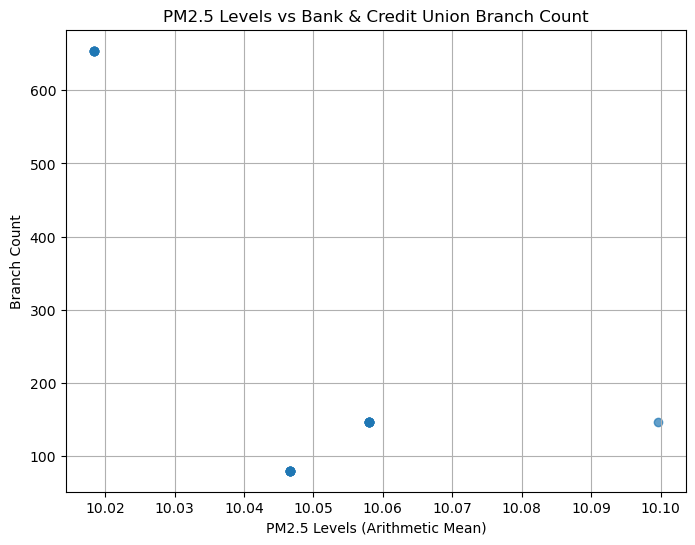

In [38]:
import matplotlib.pyplot as plt

# Scatter plot of PM2.5 vs Branch Count
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['arithmetic_mean'], filtered_data['branch_count'], alpha=0.7)
plt.title("PM2.5 Levels vs Bank & Credit Union Branch Count")
plt.xlabel("PM2.5 Levels (Arithmetic Mean)")
plt.ylabel("Branch Count")
plt.grid(True)
plt.show()